# Set Up

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ignore warnings
from sklearn.exceptions import DataConversionWarning
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=DataConversionWarning)

plt.rcParams.update({'figure.max_open_warning': 0})

# seaborn plot settings
sns.set(style="ticks", rc={'figure.figsize':(12,8)})
sns.set_palette("coolwarm")

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# read data for the Boston Housing Study
boston_input = pd.read_csv('boston.csv')

# Data Preparation

In [2]:
print('\nGeneral Description of the Boston DataFrame:')
print(boston_input.info())


General Description of the Boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [3]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

print('\nGeneral description of the Boston DataFrame:')
print(boston.info())


General description of the Boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


# Data Exploration

In [4]:
print('First Five Rows of the Boston DataFrame:')
boston.head()

First Five Rows of the Boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
print('Descriptive statistics of the Boston DataFrame:')
boston.describe()

Descriptive statistics of the Boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


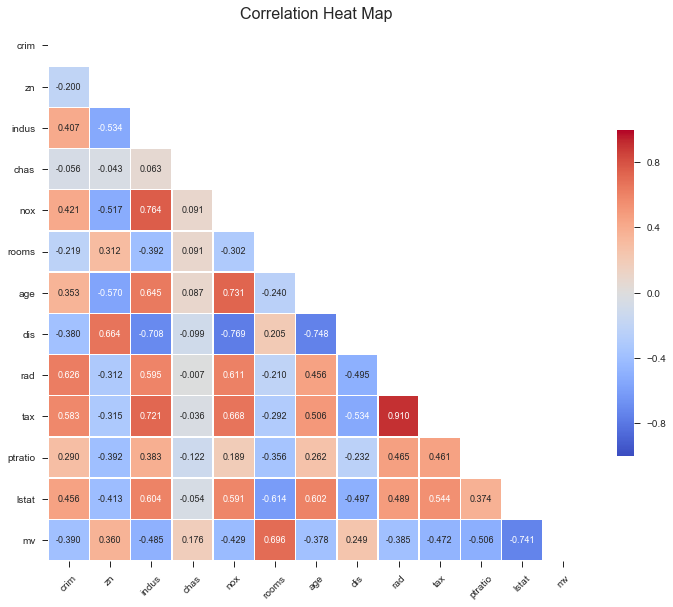

In [6]:
# correlation matrix/heat map to examine correlations among housing variables
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map', fontsize=16)   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)     
    
corr_chart(df_corr = boston)

Notes:
Based off of this heatmap, it seems like the median price has positive correlations with:
- the number of rooms - rooms (0.696)
- percentage of land zoned for lots - zn (0.360) 
- the weighted distance to employment centers - dis (0.249) 
- whether or not the house is located on the Charles River - chas (0.176)

The median price also has a very negative correlation with the percentage of the population being of a lower socioeconomic status - istat (-0.741)

In addition, the tax rate (tax) and accessibility to the radial highway has a strong correlation (0.910)

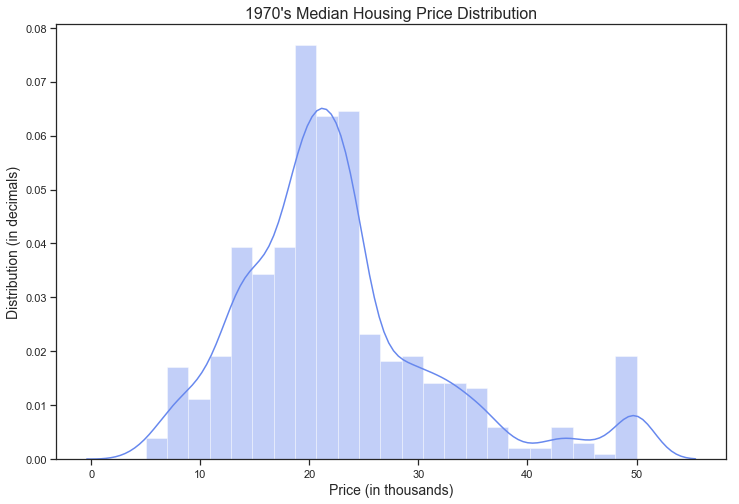

<Figure size 864x576 with 0 Axes>

In [29]:
# view the distribution of the mv variable

sns.distplot(boston["mv"])

plt.title("1970's Median Housing Price Distribution", fontsize = 16)
plt.xlabel("Price (in thousands)", fontsize = 14)
plt.ylabel("Distribution (in decimals)", fontsize = 14)
plt.show()

plt.savefig('mvdist.pdf')

In [8]:
# view the skew of the data
print("Skewness of variable mv: {}".format(boston['mv'].skew()))

Skewness of variable mv: 1.1109118502479587


Note: Because mv has a skewness of > 1, it is considered substantially skewed

In [9]:
# normalize the variable mv by taking the log of its values
logmv = np.log1p(boston['mv'])    # use log1p for correct output when x is a small value

boston['logmv'] = logmv

print("Skewness of log variable mv: {}".format(logmv.skew()))

Skewness of log variable mv: -0.24563979611568673


Note: normalizing mv by performing a log transformation has reduced the skewness substantially 

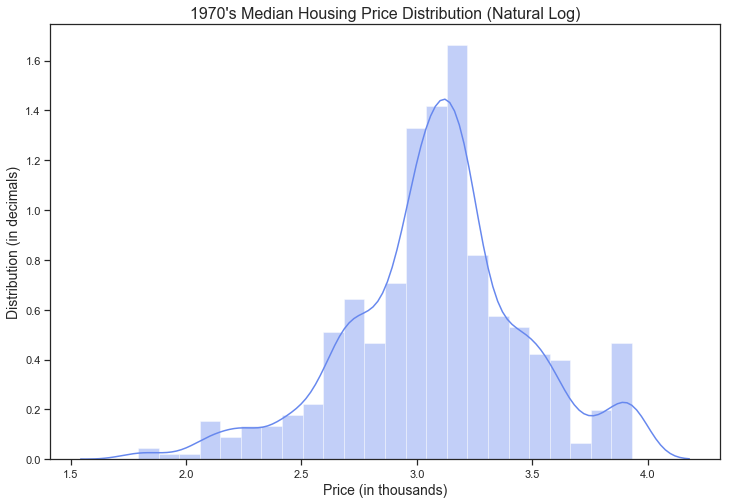

<Figure size 864x576 with 0 Axes>

In [30]:
# view distribution of log transformed mv

sns.distplot(logmv)

plt.title("1970's Median Housing Price Distribution (Natural Log)", fontsize = 16)
plt.xlabel("Price (in thousands)", fontsize = 14)
plt.ylabel("Distribution (in decimals)", fontsize = 14)
plt.show()

plt.savefig('logmvdist.pdf')

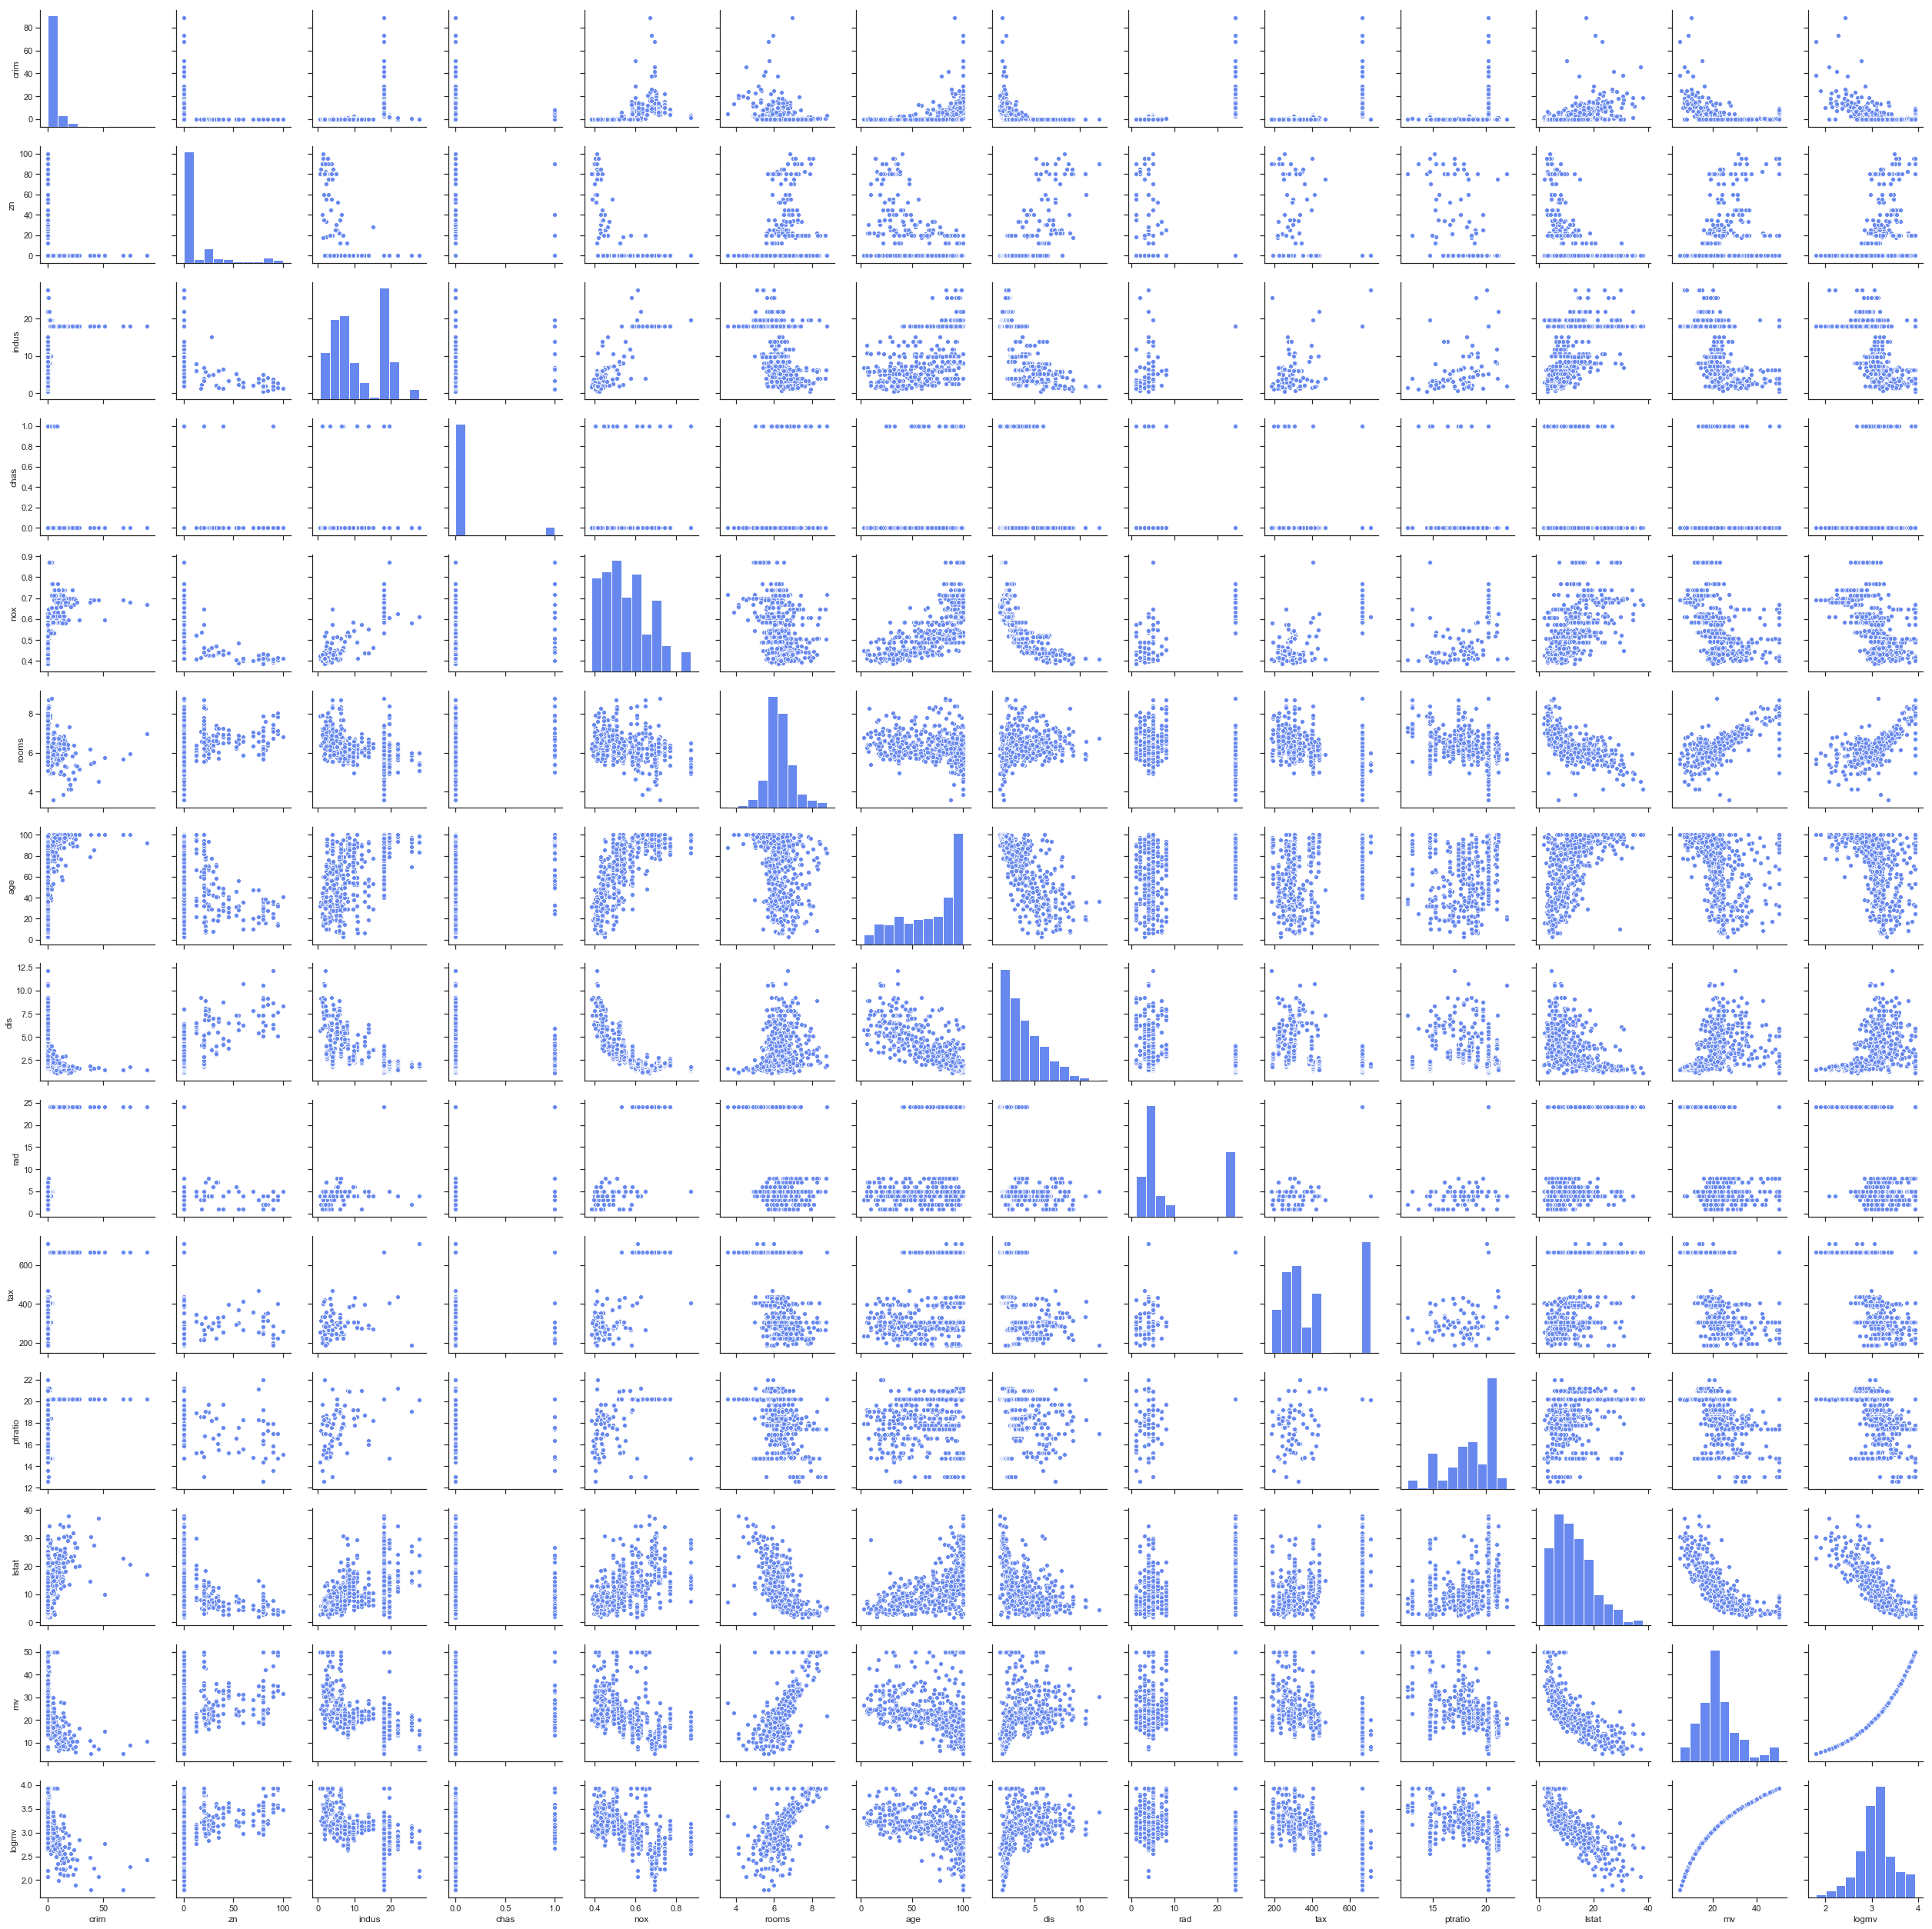

<Figure size 864x576 with 0 Axes>

In [14]:
sns.pairplot(boston)

plt.show()

plt.savefig('pairplot.pdf')


# Model Set Up

<b>Model Set-Up - Defining Model Data</b>

In [13]:
# set up linear, tree-based models and rmse metric
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

names = ["OLS", "Ridge Regression", "Lasso Regression", "ElasticNet", "Decision Tree", "Random Forest", 'Gradient Boosting']
linmodel = [LinearRegression(), 
            Ridge(alpha=0.1, fit_intercept=True, normalize=False, 
                  copy_X=True, max_iter=None, tol=0.001, solver='auto', 
                  random_state=RANDOM_SEED), 
            Lasso(alpha=0.1, fit_intercept=True, normalize=False, 
                  precompute=False, copy_X=True, max_iter=1000, tol=0.0001, 
                  warm_start=False, positive=False, random_state=RANDOM_SEED, 
                  selection='cyclic'), 
            ElasticNet(alpha=0.1, l1_ratio=0.5, fit_intercept=True, 
                       normalize=False, precompute=False, max_iter=1000, 
                       copy_X=True, tol=0.0001, warm_start=False, 
                       positive=False, random_state=RANDOM_SEED, 
                       selection='cyclic'),
            DecisionTreeRegressor(max_depth=10, random_state = RANDOM_SEED,
                                    max_features='log2'),
            RandomForestRegressor(max_depth=10, random_state = RANDOM_SEED,
                                    max_features='log2', bootstrap=True),
           GradientBoostingRegressor(max_depth=10, random_state = RANDOM_SEED, 
                                     max_features='log2', learning_rate=0.1)]

In [14]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

X = np.array([boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

y = np.array([boston.mv]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('Data dimensions:', prelim_model_data.shape)

Data dimensions: (506, 13)


In [15]:
# standard scores for the columns... along axis 0
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler())
    ])

In [16]:
# the model data will be standardized form of preliminary model data
model_data = pipe.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('Dimensions for model_data:', model_data.shape)

Dimensions for model_data: (506, 13)


<b>K-Fold Cross Validation & Model Set Up</b>

In [17]:
from sklearn.model_selection import KFold

# define number of folds for cross validation - 5 folds
n_folds = 5

# set up numpy array for storing results
rmse_results = np.zeros((n_folds, len(linmodel)))
test_results = np.zeros((n_folds, len(linmodel)))

kf = KFold(n_splits = n_folds, shuffle=False, random_state = RANDOM_SEED)

#initialize fold count
fold_count = 0

for train_index, test_index in kf.split(model_data):
    # define test and train variables
    # x represents the explanatory variables
    X_train = model_data[train_index, 1:model_data.shape[1]] # 1 to last
    X_test = model_data[test_index, 1:model_data.shape[1]] # 1 to last
    
    # model_data.shape[1]-1 is the response - predictive variable
    y_train = model_data[train_index,0] # 0
    y_test = model_data[test_index,0] # 0
    
    print("\n---------------- Fold Count: {} ----------------".format(fold_count))
    # define test and train variables
    # x represents the explanatory variables
    X_train = model_data[train_index, 1:model_data.shape[1]] # 1 to last
    X_test = model_data[test_index, 1:model_data.shape[1]] # 1 to last
    
    # model_data.shape[1]-1 is the response - predictive variable
    y_train = model_data[train_index,0] # 0
    y_test = model_data[test_index,0] # 0
   

    
    # provides info on the data shape for each fold
    print("\nShape of data for fold {}:".format(fold_count))
    print("Data Set: (Observations, Features)")
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    model_count = 0
    
    for name, linear in zip(names, linmodel):
        # fit the model to the training set
        linear.fit(X_train, y_train)
        pred = linear.predict(X_test)
        train_score = linear.score(X_train, y_train)
        test_score = linear.score(X_test, y_test)
        mse = mean_squared_error(y_test, pred)
        rmse = sqrt(mean_squared_error(y_test, pred))
        
        rmse_results[fold_count, model_count] = rmse
        test_results[fold_count, model_count] = test_score
        
        print("\n{}".format(name))
        print("Train Set Fit: {}".format(round(train_score, 2)))
        print("Test Set Fit: {}".format(round(test_score, 2)))

        print("RMSE: {}".format(round(rmse, 2)))
        
        model_count += 1
        
    fold_count += 1
        



---------------- Fold Count: 0 ----------------

Shape of data for fold 0:
Data Set: (Observations, Features)
X_train: (404, 12)
X_test: (102, 12)
y_train: (404,)
y_test: (102,)

OLS
Train Set Fit: 0.74
Test Set Fit: 0.65
RMSE: 0.38

Ridge Regression
Train Set Fit: 0.74
Test Set Fit: 0.65
RMSE: 0.38

Lasso Regression
Train Set Fit: 0.67
Test Set Fit: 0.73
RMSE: 0.33

ElasticNet
Train Set Fit: 0.7
Test Set Fit: 0.73
RMSE: 0.33

Decision Tree
Train Set Fit: 0.99
Test Set Fit: 0.05
RMSE: 0.62

Random Forest
Train Set Fit: 0.97
Test Set Fit: 0.71
RMSE: 0.35

Gradient Boosting
Train Set Fit: 1.0
Test Set Fit: 0.71
RMSE: 0.34

---------------- Fold Count: 1 ----------------

Shape of data for fold 1:
Data Set: (Observations, Features)
X_train: (405, 12)
X_test: (101, 12)
y_train: (405,)
y_test: (101,)

OLS
Train Set Fit: 0.73
Test Set Fit: 0.71
RMSE: 0.55

Ridge Regression
Train Set Fit: 0.73
Test Set Fit: 0.71
RMSE: 0.55

Lasso Regression
Train Set Fit: 0.65
Test Set Fit: 0.69
RMSE: 0.58



# Feature Selection

In [19]:
# train the random forest regressor with our previous training set
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat']

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# display features with their gini importance scores
for feature in zip(features, gbr.feature_importances_):
    print(feature)

('crim', 0.11281247307891945)
('zn', 0.012581857632763023)
('indus', 0.035171532634912885)
('chas', 0.0028453360357707669)
('nox', 0.035645651966059164)
('rooms', 0.26548677985808566)
('age', 0.12182168493137664)
('dis', 0.14327793992504614)
('rad', 0.014435510298648393)
('tax', 0.074195411462340322)
('ptratio', 0.03920149217016286)
('lstat', 0.14252433000591461)


In [20]:
# displays the important variables
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(gbr)
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

crim
rooms
age
dis
lstat


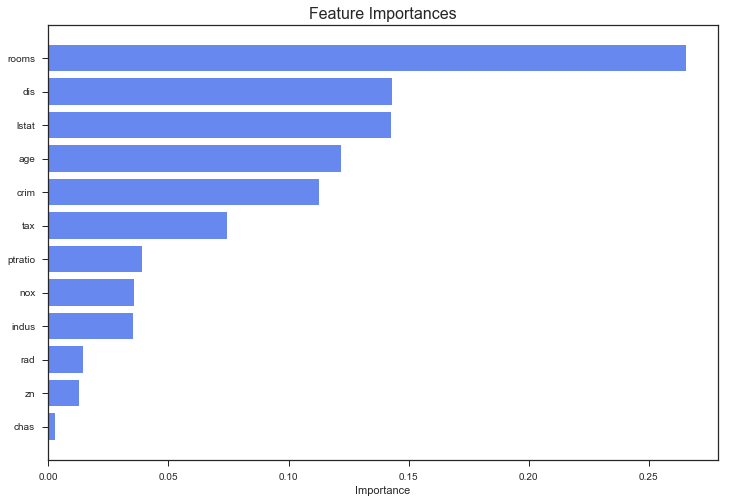

In [22]:
# plot feature importances
importances = gbr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances', fontsize=16)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

# Regression Decision Tree Visual - Random Forest

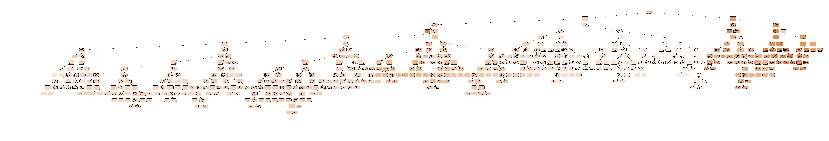

In [34]:
# visualization of the tree
estimator = rfr.estimators_[5]

# export tree visualization as a dot file
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='rfr.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'rfr.dot', '-o', 'rfr.png', '-Gdpi=600'])

# Display in python (View the original png for better quality)
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('rfr.png'))
plt.axis('off');
plt.show();

# Model Results

In [35]:
# load cross validation data into a DataFrame
rmseresults = pd.DataFrame(rmse_results)
rmseresults.columns = names

testresults = pd.DataFrame(test_results)
testresults.columns = names

# print average results for models
print("Average Regressor Performance:")
rmseresults = rmseresults.mean()
rmseresults = rmseresults.reset_index()
rmseresults.columns = ['Regressor', 'RMSE']

testresults = testresults.mean()
testresults = testresults.reset_index()
testresults = pd.DataFrame(testresults)
testresults.columns = ['Regressor', 'Score']

results = pd.merge(testresults, rmseresults, on='Regressor')
results

Average Regressor Performance:


,Regressor,Score,RMSE
0,OLS,0.383111,0.625297
1,Ridge Regression,0.383584,0.625095
2,Lasso Regression,0.337006,0.654895
3,ElasticNet,0.383630,0.632776
4,Decision Tree,0.147797,0.755922
5,Random Forest,0.552112,0.516711
6,Gradient Boosting,0.641937,0.488385


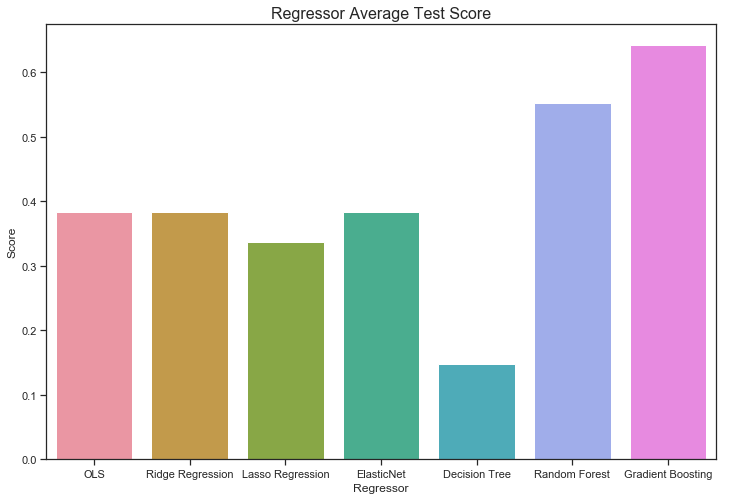

In [36]:
sns.barplot(x='Regressor', y='Score', data=results)
plt.title('Regressor Average Test Score', fontsize=16)

plt.savefig('regscore.pdf')

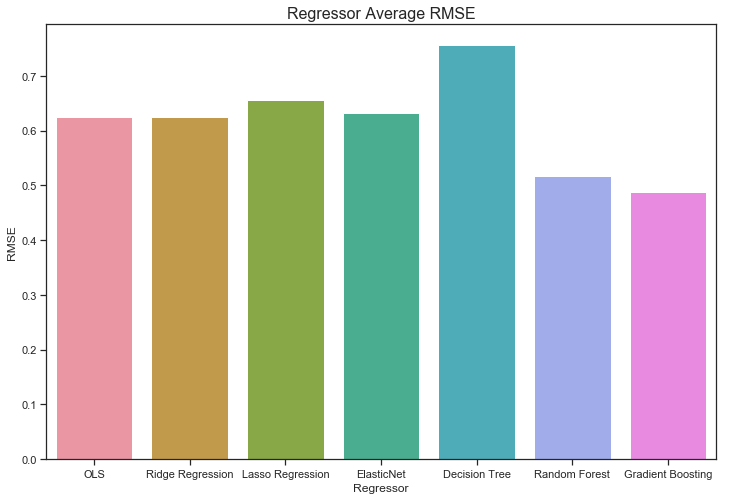

In [37]:
sns.barplot(x='Regressor', y='RMSE', data=results)
plt.title('Regressor Average RMSE', fontsize=16)

plt.savefig('regrmse.pdf')

# Employment of Gradient Boosting Regression to Full Dataset

In [74]:
gbr = GradientBoostingRegressor(max_depth=10, random_state = RANDOM_SEED)

gbr.fit(X,y)
gbrrmse = sqrt(mean_squared_error(y, gbr.predict(X)))
print("Model Score: {}".format(gbr.score(X,y)))
print("RMSE: {}".format(gbrrmse))

Model Score: 0.9999999259668894
RMSE: 0.0024959106617544946
